# **Module 6: Descriptive and Predictive Modeling**
## **Exercise 1:** K-Nearest Neighbors in depth **(Breast cancer)**
### **Submitted by:** Jorge de la Torre Garcia (DNI), Lydia Phoebe Amanda Lilius (DNI), Miguel Galán Cisneros (DNI), Vitor Oliveira de Souza (Z0963220P)
### **Date:** 25/02/2024

#### **A)** "from sklearn.datasets import load_breast_cancer" (basic)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
# Load dataset from sklearn datasets
dataset = load_breast_cancer()

In [3]:
# Get input data from dataset
X = pd.DataFrame(dataset.data)
# Get feature names
X.columns = dataset.feature_names
# Get output labels
y = pd.DataFrame(dataset.target)
y.columns = ['target']

#### 1) Describe the dataset in dimensions such as number of features, number of categories, and number of samples per category using Python.

In [4]:
# Take a look in input data
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Analyse input and output data shapes
X.shape, y.shape

((569, 30), (569, 1))

In [6]:
# Get labels names
target_names = dataset.target_names
y['labels'] = y['target'].map(lambda x: target_names[x])
y.groupby('labels').size()

labels
benign       357
malignant    212
dtype: int64

In [7]:
# Analyse input data distribution
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


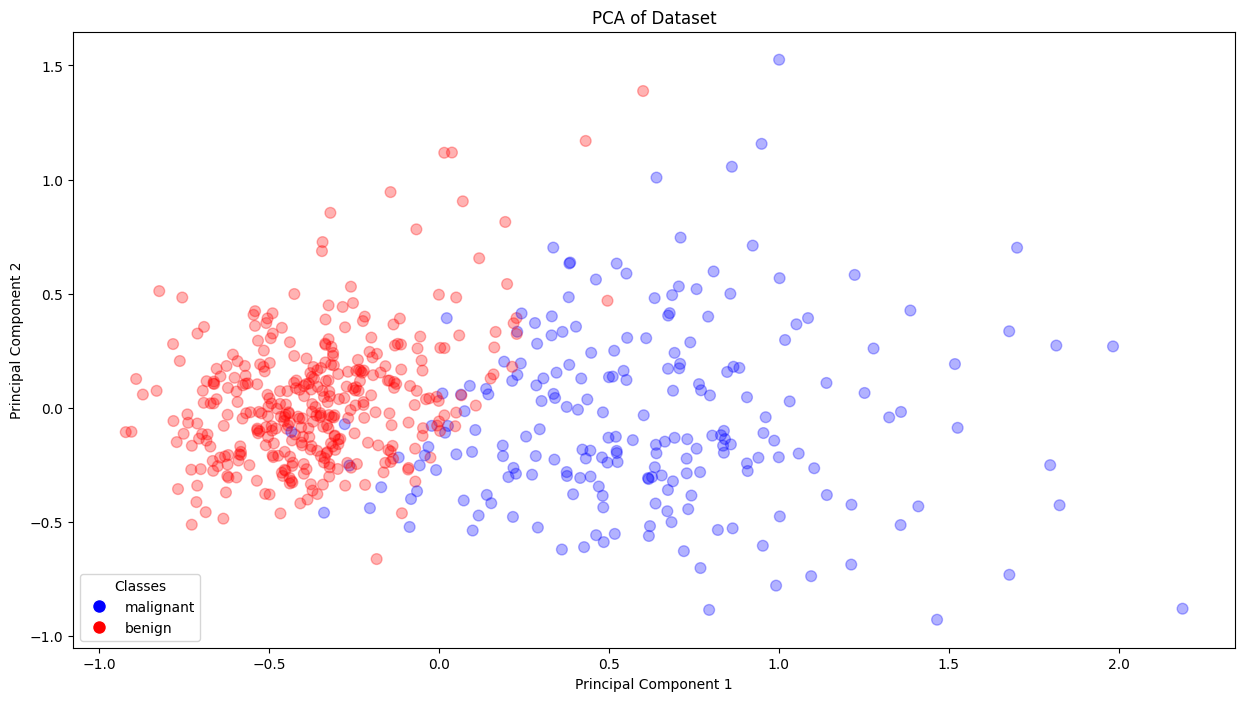

In [14]:
# Visualise the data in 2D using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.lines import Line2D
%matplotlib inline


# Create a function because we'll use it later to check the model's results
def print_pca(data, 
              y, 
              highlight_index=None,
              highlight_points=None,
              text='',
              dim_reducer=PCA(n_components=2),
              scaler=MinMaxScaler()
             ):
    
    X_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
    
    # Perform PCA
    X_pca = dim_reducer.fit_transform(X_scaled)
    X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X_scaled.index)
    X_pca['labels'] = [text+'malign' if target == 0 else text+'benign' for target in y['target']]

    # Plot the data
    fig, ax = plt.subplots(figsize=(15, 8))
    scatter = ax.scatter(x=X_pca['PC1'],
               y=X_pca['PC2'],
               c=y['target'],
               cmap='bwr',
               s=60,alpha=0.3)

    # Plot highlighted points based on the index list provided
    if highlight_index is not None:

        print(X_pca.loc[highlight_index].index)
        
        highlighted = ax.scatter(x=X_pca['PC1'].loc[highlight_index],
                                 y=X_pca['PC2'].loc[highlight_index],
                                 c='lime', marker='x', s=60, alpha=1)
        # Annotate highlighted points
        for i in highlight_index:
            ax.annotate(X_pca['labels'].loc[i], 
                        (X_pca['PC1'].loc[i], X_pca['PC2'].loc[i]),
                        textcoords="offset points", # Positioning of the text
                        xytext=(0,10), # Distance from the point to the text
                        ha='center') # Horizontal alignment
    
    # Highlight additional points specified directly that are not in the main dataset
    if highlight_points is not None:
        
        # Scale the highlight_points with the same scaled
        highlight_points_scaled = pd.DataFrame(scaler.transform(highlight_points), columns=highlight_points.columns, index=highlight_points.index)
        # Transform using PCA using the same pca transformer
        highlight_points_pca = dim_reducer.transform(highlight_points_scaled)
        
        # Plot the highlighted points
        for point in highlight_points_pca:
            ax.scatter(point[0], point[1], c='gold', edgecolor='black', marker='o', s=60, alpha=1)

    
    # Create custom legend
    classes = dataset.target_names
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=classes[i],
                              markerfacecolor='b' if i==0 else 'r', markersize=10) for i in range(len(classes))]
    ax.legend(handles=legend_elements, loc="lower left", title="Classes")
        
    # Set titles and labels
    ax.set_title('PCA of Dataset')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

print_pca(X,y)

In [15]:
def print_pca_3d(data,y):
    # Now visualize the data in 3d
    %matplotlib qt

    # Scale data
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    # Perform PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3'])
    X_pca['label'] = ['malignant' if target == 0 else 'benign' for target in y['target']]
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca['PC1'],
               X_pca['PC2'],
               X_pca['PC3'],
               c=y['target'],
               cmap='bwr',
               s=60,alpha=0.5)

print_pca_3d(X,y)

#### Answer 1:
##### **Number of features**: The dataset comprises 30 features. These features might include various measurements or characteristics relevant to the study of breast cancer.
##### **Number of categories**: There are two categories within the dataset: Malignant and Benign. These categories represent the classification targets for our analysis, indicating whether samples are indicative of malignant (cancerous) or benign (non-cancerous) conditions.
##### **Number of samples in each category**: The dataset contains 212 samples classified as malignant. These represent cases where the condition is potentially harmful and requires detailed examination. Conversely, there are 357 samples identified as benign, indicating conditions that are generally not harmful.
##### **Inbalanced data**: An initial observation suggests that the dataset is somewhat imbalanced, with a greater number of benign samples compared to malignant ones. This imbalance could influence the performance of machine learning models, necessitating techniques such as weighted evaluation metrics to ensure model reliability across both categories.
##### **Presence of mixed datapoints/outliers**: Visual inspection, particularly through 2D and 3D projections with PCA, reveals that there is some degree of overlap between the categories. Points that is labeled with malign category are found within clusters of the benign category, indicating the potential presence of **outliers** or **challenging cases**.
# ------------------------------------------------------------------------------------------

#### 2) Represent the statistical support of every feature graphically, resorting to Matplotlib’s boxplot function. Are there any outliers that can be detected by simple visual inspection? If so, devise a handcrafted method to detect and isolate such examples.

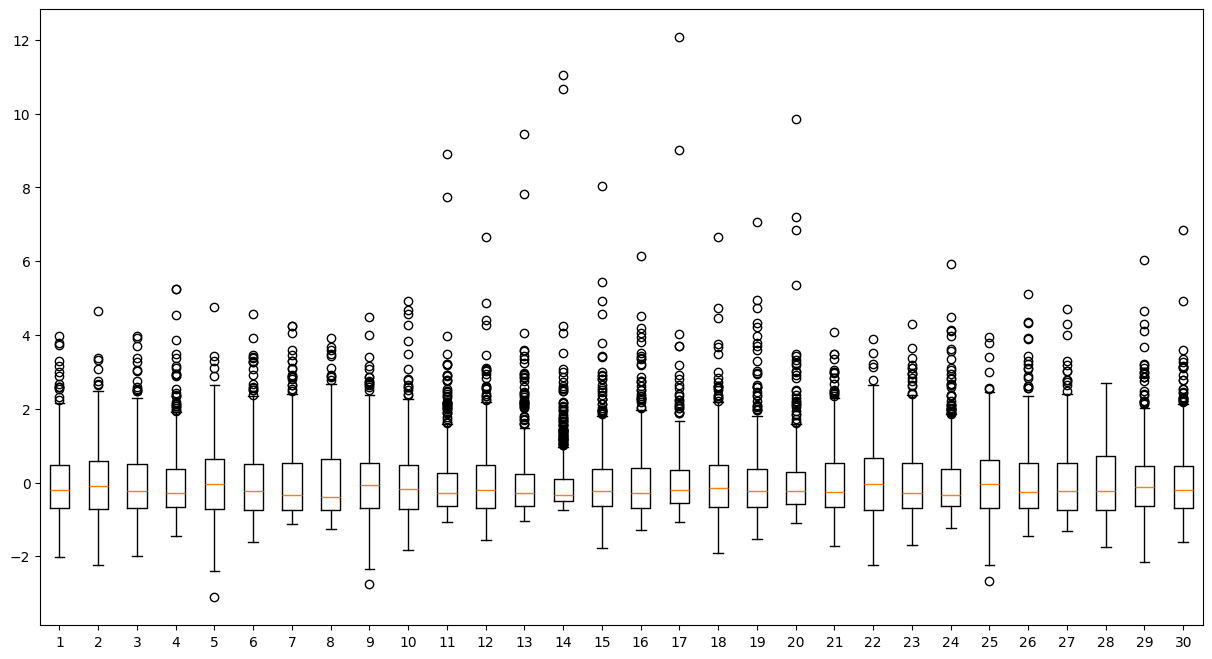

In [16]:
# Let's check all the boxplots together
%matplotlib inline
scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(scaler.fit_transform(X))
fig, ax = plt.subplots(figsize=(15, 8))
ax.boxplot(X_standard_scaled);

In [17]:
# Altough it's a widely distribuited data, it seems there're some points too far away from the median value
# Let's clean the outliers considering 5 times the IQR interval as a threashold
def get_outliers_indices(data, columns_outliers):
    indices_to_remove = []
    for column in columns_outliers:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        IQR = q3 - q1
        # Find the indices outside the acceptable range
        outliers = data[(data[column] < q1 - 5 * IQR) | (data[column] > q3 + 5 * IQR)].index
        indices_to_remove.extend(outliers)  # Use extend to flatten the list
    indices_to_remove = list(set(indices_to_remove))  # Remove duplicates
    return indices_to_remove
    
# Lets join X and y to clean them at the same time
df = X.join(y)
columns_outliers = [col for col in df.columns if col not in ['target', 'labels']]
outliers_index = get_outliers_indices(df,columns_outliers)
outliers_index
df_cleaned = df.drop(outliers_index)
df_cleaned.groupby('target').size()

target
0    202
1    351
dtype: int64

Index([192, 290, 3, 68, 71, 265, 9, 461, 78, 368, 176, 212, 213, 152, 122,
       190],
      dtype='int64')


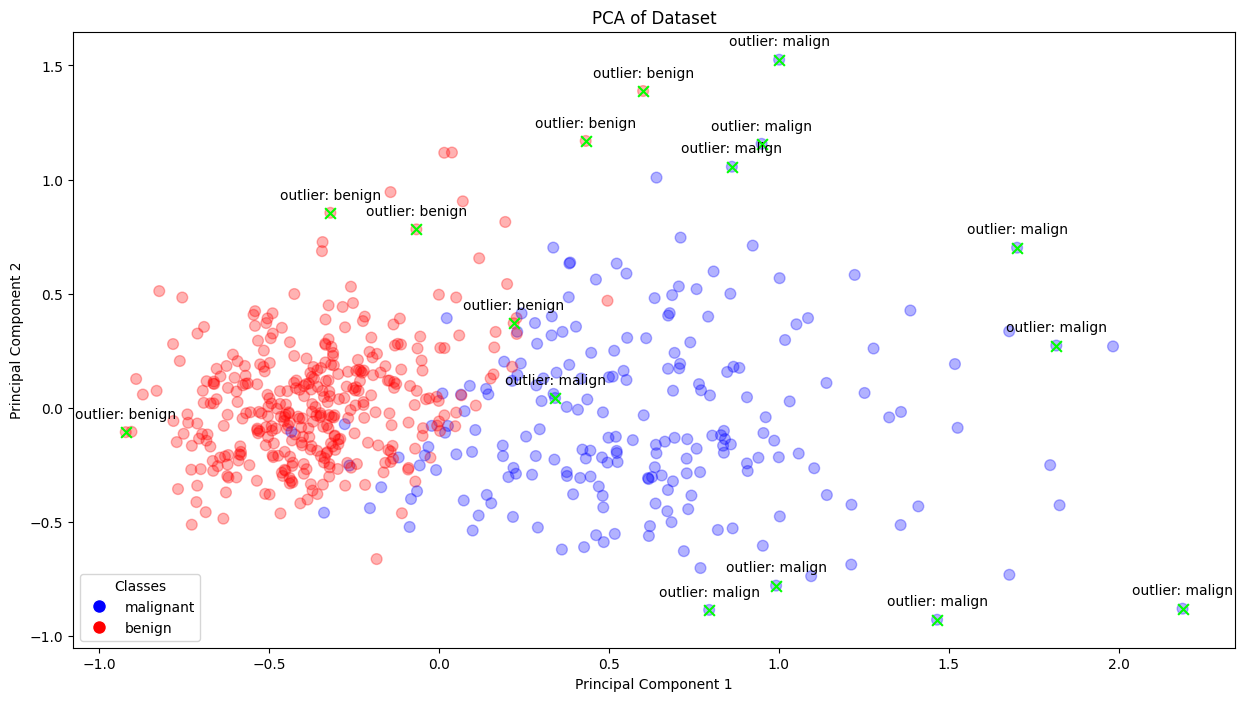

In [18]:
# Let's print the outliers that were removed
print_pca(X,y,outliers_index,text='outlier: ')

#### Answer 2:
##### The boxplot visualization indicates a wide distribution across almost all features, with numerous data points lying outside the whiskers. These points are typically considered outliers in a conventional analysis context. However, our assessment suggests that these aren't outliers in the traditional sense but rather indicate the presence of subgroups within the data, each with distinct distributions.
##### This heterogeneity within the data is not necessarily detrimental; on the contrary, it could enrich our analysis by revealing underlying patterns that assist in classifying the dataset accurately. It highlights the complexity of the data and suggests that multiple factors may influence the outcomes we are trying to predict.

### Approach to Outlier Detection:
##### Despite recognizing the value of the wide data distribution, we identified certain points as extreme outliers, significantly distanced from the majority of data points in specific features. These extreme values could potentially skew our analysis and model training.
##### To address outliers, we applied a method focusing on the interquartile range (IQR). Specifically, we set a threshold at 5 times the IQR from the first and third quartiles. This approach aims to retain the inherent data structure and variability while excluding extreme outliers that could adversely affect our analysis.
##### We implemented a Python function to calculate the IQR for each feature and identify indices of data points lying beyond the acceptable range (5 times the IQR from the Q1 and Q3 quartiles). These indices represent the outliers we decided to remove.
##### **Important:** The threashold of 5 times IQR was set by visual inpecting of the features distributions.
# ------------------------------------------------------------------------------------------

#### 3) Repeat each of the experiments seen in class with the K-Nearest Neighbors model, providing arguments for each of the steps taken along the process, and commenting on the partial results obtained with the selected dataset. Please use as many performance metrics as needed to illustrate the particularities of the selected dataset (e.g. imbalanced classes).



In [19]:
# First we separate the input and output again (after outlier cleaning)
X_cleaned = df_cleaned.drop(columns=['target','labels'])
y_cleaned = df_cleaned[['target','labels']]

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

# Now we create a splitter to split the data considering the classes
# If we simply split the data randomly, the unbalanced classes could be splitted unevenly in train and test
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X_cleaned, y_cleaned):
    Xtrain, ytrain = X_cleaned.iloc[train_index], y_cleaned.iloc[train_index]
    Xtest, ytest = X_cleaned.iloc[test_index], y_cleaned.iloc[test_index]

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# First, we construct a Pipeline comprising two key components: a Scaler and a KNN Classifier Model.
# Utilizing a Pipeline streamlines the preprocessing and modeling process. Specifically, after the Scaler is fitted to the training data,
# it can be directly applied to the test data without the need for re-fitting. This approach ensures consistency in data preprocessing
# between training and testing phases, which is crucial for evaluating the model's performance on new, unseen data.
# Adhering to this practice prevents data leakage and ensures that our model's performance metrics accurately reflect its ability to generalize to new data.
estimator = Pipeline([('Scaler',MinMaxScaler()),('KNN',KNeighborsClassifier())])

# Then we define a parameter grid to search over with grid search techniques
param_grid = {'KNN__n_neighbors':[3,5,7,9,11,13,15]}

# We create our model selector using Grid search and Cross validations with 10 folds
gscv = GridSearchCV(
    estimator,
    param_grid,
    scoring="accuracy",
    cv=3,
    verbose=5,
    n_jobs=-1
)

# Then we fit our models using train dataset and keep track on computational time
start_time = datetime.now()
gscv.fit(Xtrain,ytrain['target'])
total_time = datetime.now() - start_time

Fitting 3 folds for each of 7 candidates, totalling 21 fits


In [22]:
# Now let's check what was considered the best set of parameters:
gscv.best_params_

{'KNN__n_neighbors': 5}

Total Time: 	0:00:03.491893 seconds
Avg acc (CV):	0.9638
Acc (Test): 	0.9730
Kappa (Test): 	0.9411
F1 (Test): 	0.9790
AUC: 		0.9854


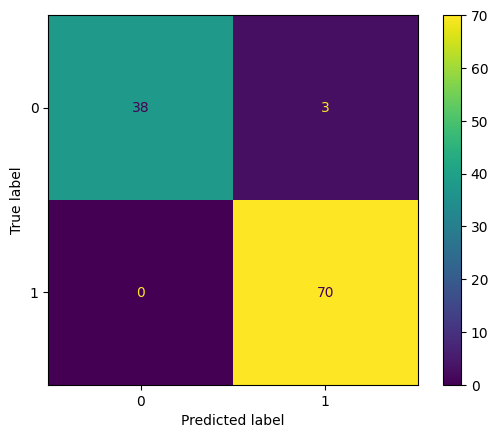

In [25]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, cohen_kappa_score
import matplotlib.pyplot as plt

# Evaluate the model's performance on the test dataset, focusing on metrics such as accuracy, F1 score, ROC AUC, and the confusion matrix.

# Reporting computational time for model training and grid search
print(f'Total Time: \t{total_time} seconds')

# Displaying the average accuracy obtained from cross-validation
print(f"Avg acc (CV):\t{gscv.best_score_:.4f}")

# Fitting the best model found via grid search to the training data
best_estimator = gscv.best_estimator_
best_estimator.fit(Xtrain, ytrain['target'])

# Predicting class labels for the test set
ypred = best_estimator.predict(Xtest)

# Obtaining probability estimates for the test set (used for ROC AUC calculation)
yprob = best_estimator.predict_proba(Xtest)[:, 1]  # Extracting probabilities for the positive class

# Computing and displaying accuracy , cohen_kappa_score and F1 score for the test set
print(f'Acc (Test): \t{accuracy_score(ytest["target"], ypred):.4f}')
print(f'Kappa (Test): \t{cohen_kappa_score(ytest["target"], ypred):.4f}')
print(f'F1 (Test): \t{f1_score(ytest["target"], ypred):.4f}')

# Calculating and printing the ROC AUC score
roc_auc = roc_auc_score(ytest["target"], yprob)
print(f'AUC: \t\t{roc_auc:.4f}')

# Generating and displaying the confusion matrix
cm = confusion_matrix(ytest["target"], ypred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

Index([91, 38, 414], dtype='int64')


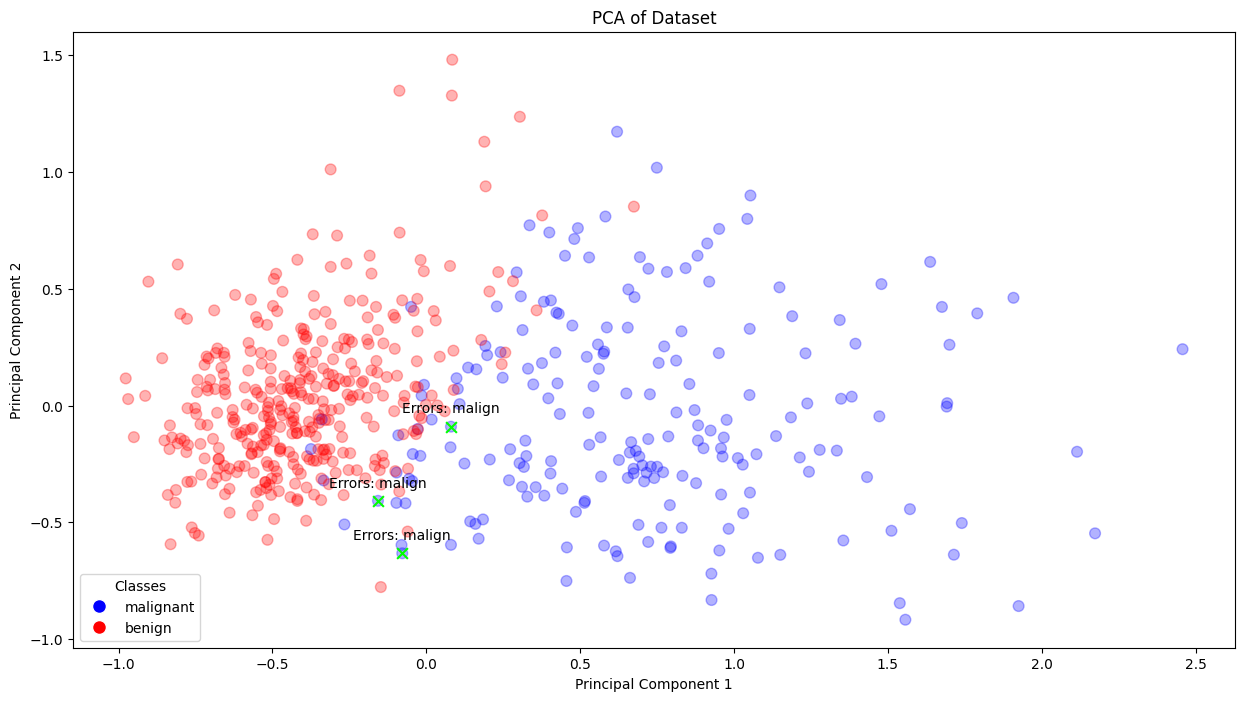

In [24]:
# Let's check graphcally which examples couldn't correctly classified by our model
errors = ytest['target'][ytest['target'] != ypred].index
print_pca(X_cleaned,y_cleaned,highlight_index=errors,text='Errors: ')

#### Answer 3:
##### **Average Accuracy (CV):** Altouhgh we are working with a simple dataset, the average accuracy of 0.9638 (or 96.38%) during cross-validation (CV) can be considered high. This metric indicates that the model, on average, correctly predicts the outcome 96.38% of the time during the cross-validation phase. It's a strong indicator of the model's reliability and its ability to generalize well to unseen data.
##### **Accuracy (Test):** The accuracy on the test dataset is 0.9730 (or 97.30%), slightly higher than the CV accuracy. This slight increase suggests that the model performs consistently well on both unseen data (test set) and during the cross-validation process, reinforcing its robustness.
##### **Kappa (Test):** The Cohen's Kappa score of 0.9411 (or 94.11%) on the test set is good. The Kappa score is a more robust measure than simple accuracy as it takes into account the agreement that occurs by chance. A score close to 1 indicates that the model has a very high level of agreement between the predicted and actual values, accounting for random chance. This high score suggests the model's predictions are in excellent agreement with the actual outcomes.
##### **F1 Score (Test):** The F1 score of 0.9790 (or 97.90%) on the test dataset is particularly good for datasets with imbalanced classes. The F1 score combines precision and recall into a single metric, providing a balanced view of the model's performance, especially in terms of correctly predicting the minority class. A score this high indicates the model excels in balancing the trade-off between precision and recall.
##### **AUC:** The Area Under the ROC Curve (AUC) score of 0.9854 (or 98.54%) is exceptional. The AUC measures the model's ability to distinguish between classes. A score close to 1.0 indicates that the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative one. This high AUC score demonstrates the model's excellent discriminative power, further affirming its capability to handle positive and negative class distinctions effectively.

# ------------------------------------------------------------------------------------------

#### 4) Read the Scikit-learn library documentation and configure the automated validation script so that the GridSearchCV() function uses leave-one-out cross-validation instead of k-fold. Which conclusions can be drawn from the mean cross-validation scores and the test scores using a k-neighbor model with optimized k?

In [26]:
from sklearn.model_selection import LeaveOneOut

gscv_loo = GridSearchCV(
    estimator,
    param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=2,
    n_jobs=-1,
    return_train_score = True
)

start_time = datetime.now()
gscv_loo.fit(Xtrain,ytrain['target'])
total_time = datetime.now() - start_time

Fitting 442 folds for each of 7 candidates, totalling 3094 fits


In [27]:
gscv_loo.best_params_

{'KNN__n_neighbors': 5}

In [28]:
results = pd.DataFrame(gscv_loo.cv_results_)
results['mean_test_score']
#results.head(10)

0    0.968326
1    0.970588
2    0.970588
3    0.970588
4    0.970588
5    0.968326
6    0.963801
Name: mean_test_score, dtype: float64

Total Time: 	0:00:36.333039 seconds
Avg acc (CV):	0.9706
Acc (Test): 	0.9730
Kappa (Test): 	0.9411
F1 (Test): 	0.9790
AUC: 		0.9854


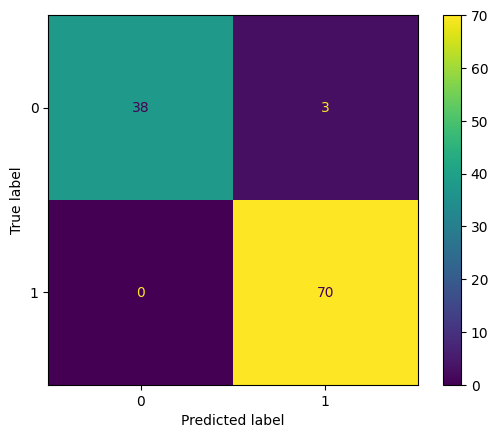

In [31]:
# Evaluate the model's performance on the test dataset, focusing on metrics such as accuracy, F1 score, ROC AUC, and the confusion matrix.

# Reporting computational time for model training and grid search
print(f'Total Time: \t{total_time} seconds')

# Displaying the average accuracy obtained from cross-validation
print(f"Avg acc (CV):\t{gscv_loo.best_score_:.4f}")

# Fitting the best model found via grid search to the training data
best_estimator = gscv_loo.best_estimator_
best_estimator.fit(Xtrain, ytrain['target'])

# Predicting class labels for the test set
ypred = best_estimator.predict(Xtest)

# Obtaining probability estimates for the test set (used for ROC AUC calculation)
yprob = best_estimator.predict_proba(Xtest)[:, 1]  # Extracting probabilities for the positive class

# Computing and displaying accuracy and F1 score for the test set
print(f'Acc (Test): \t{accuracy_score(ytest["target"], ypred):.4f}')
print(f'Kappa (Test): \t{cohen_kappa_score(ytest["target"], ypred):.4f}')
print(f'F1 (Test): \t{f1_score(ytest["target"], ypred):.4f}')

# Calculating and printing the ROC AUC score
roc_auc = roc_auc_score(ytest["target"], yprob)
print(f'AUC: \t\t{roc_auc:.4f}')

# Generating and displaying the confusion matrix
cm = confusion_matrix(ytest["target"], ypred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

Index([91, 38, 414], dtype='int64')


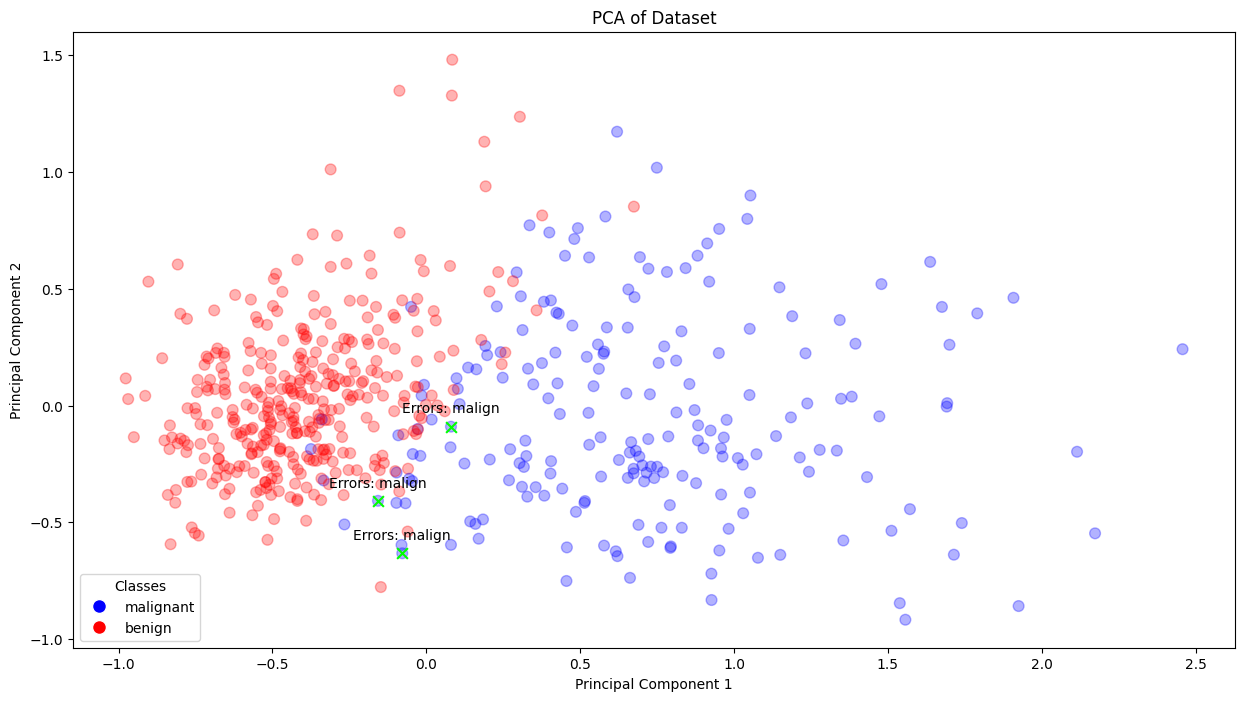

In [30]:
# Let's check graphcally which examples couldn't correctly classified by our model
errors = ytest["target"][ytest["target"] != ypred].index
print_pca(X_cleaned,y_cleaned,highlight_index=errors,text='Errors: ')

#### Answer 4:
##### **Total Time:** The total computational time increased significantly to 36.33 seconds, compared to the previous setup. This increase is expected with leave-one-out cross-validation because LOO is computationally more expensive than k-fold CV. In LOO, the model is trained N times (where N is the number of samples in the dataset) which, for large datasets, can lead to a substantial increase in computation time.
##### **Average Accuracy (CV):** The average accuracy in cross-validation is 0.9706 (or 97.06%), which is slightly higher than the accuracy obtained with k-fold CV. This slight improvement suggests that LOO cross-validation might be providing a more robust estimate of the model's performance by using nearly all data for training and testing on a single data point at a time. This method minimizes the bias in the model evaluation process, as every data point gets to be in the test set exactly once.
##### **Accuracy (Test), Kappa (Test), F1 (Test), AUC:** These metrics remain unchanged from the previous experiment. The consistency of these metrics suggests that while LOO may offer a slightly more accurate estimate of model performance during the cross-validation phase, it does not necessarily lead to a model that performs better on unseen data. This outcome underscores the importance of balancing the benefits of a more thorough cross-validation technique against the computational costs and the actual improvements in model performance on new data.
##### **Note:** All 3 False Positive errors are the same found in the previous exercise.

#### Conclusions:

##### **Better Generalization Indicator:** The closer alignment between CV and test scores is a positive sign, suggesting that the model could potentially generalize better to new, unseen data. This is particularly relevant if the dataset were more complex or if the data distribution in the real world varied more significantly than in the current dataset.
##### **Predictive Confidence:** For datasets with higher complexity, achieving a close alignment between CV and test scores can increase confidence in the model's predictive capabilities. It indicates that the model is likely to perform well even as the complexity of the task increases, making it a more reliable choice for addressing real-world problems.
##### **Computational Cost vs. Benefit:** The slight improvement in cross-validation accuracy with LOO comes at a significant computational cost. This trade-off needs to be carefully considered, especially with larger datasets where the increased computational time might not justify the marginal gains in accuracy estimation.
##### **Model Generalization:** The consistency in test metrics before and after switching to LOO suggests that the k-neighbors model with an optimized k value generalizes well to unseen data, regardless of the cross-validation technique used.
##### **Validation Technique Choice:** While LOO can provide a more detailed evaluation by leveraging more data for training, its impact on the final model's performance (as measured on an independent test set) might not always be significant.
# ------------------------------------------------------------------------------------------

#### 5) Elaborate on the need for stratifying the cross-validation process analyzing the distribution of samples by class. If so, please show with empirical evidence what could occur if such a stratification was not performed, specially when decreasing the number of samples of the dataset.

In [34]:
from sklearn.model_selection import StratifiedKFold

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat = GridSearchCV(
    estimator,
    param_grid,
    scoring="accuracy",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

start_time = datetime.now()
gscv_strat.fit(Xtrain,ytrain["target"])
total_time = datetime.now() - start_time

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [35]:
gscv_strat.best_params_

{'KNN__n_neighbors': 7}

Total Time: 	0:00:00.222687 seconds
Avg acc (CV):	0.9707
Acc (Test): 	0.9730
Kappa (Test): 	0.9417
F1 (Test): 	0.9787
AUC: 		0.9944


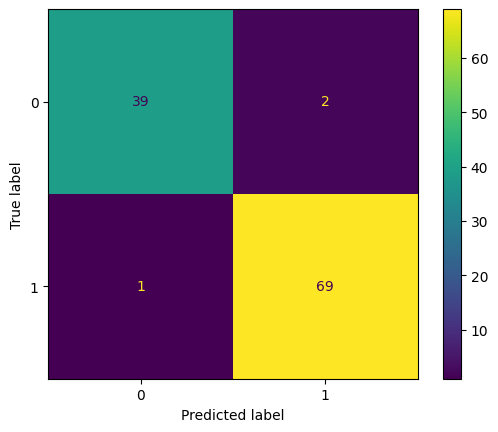

In [38]:
# Evaluate the model's performance on the test dataset, focusing on metrics such as accuracy, F1 score, ROC AUC, and the confusion matrix.

# Reporting computational time for model training and grid search
print(f'Total Time: \t{total_time} seconds')

# Displaying the average accuracy obtained from cross-validation
print(f"Avg acc (CV):\t{gscv_strat.best_score_:.4f}")

# Fitting the best model found via grid search to the training data
best_estimator = gscv_strat.best_estimator_
best_estimator.fit(Xtrain, ytrain['target'])

# Predicting class labels for the test set
ypred = best_estimator.predict(Xtest)

# Obtaining probability estimates for the test set (used for ROC AUC calculation)
yprob = best_estimator.predict_proba(Xtest)[:, 1]  # Extracting probabilities for the positive class

# Computing and displaying accuracy and F1 score for the test set
print(f'Acc (Test): \t{accuracy_score(ytest["target"], ypred):.4f}')
print(f'Kappa (Test): \t{cohen_kappa_score(ytest["target"], ypred):.4f}')
print(f'F1 (Test): \t{f1_score(ytest["target"], ypred):.4f}')

# Calculating and printing the ROC AUC score
roc_auc = roc_auc_score(ytest["target"], yprob)
print(f'AUC: \t\t{roc_auc:.4f}')

# Generating and displaying the confusion matrix
cm = confusion_matrix(ytest["target"], ypred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

Index([496, 38, 414], dtype='int64')


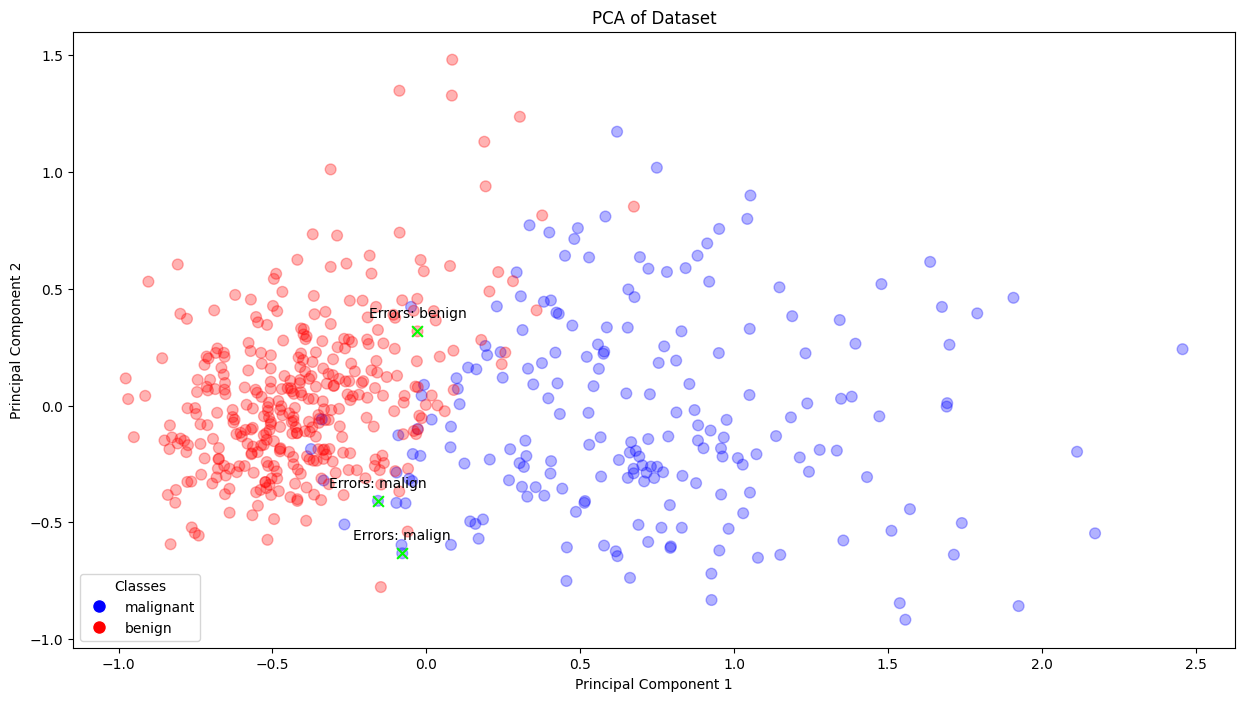

In [37]:
# Let's check graphcally which examples couldn't correctly classified by our model
errors = ytest["target"][ytest["target"] != ypred].index
print_pca(X_cleaned,y_cleaned,highlight_index=errors,text='Errors: ')

#### Answer 5:
##### **Importance of Stratification:** Without stratification, there's a significant risk, especially in imbalanced datasets, that some folds might not contain any samples from the minority class. This can lead to misleading cross-validation results, where the model might appear to perform well simply because it's being evaluated on the majority class alone.
#### Results analysis
##### **Total Time:** The execution time significantly decreased from 36.333039 seconds (leave-one-out) to just 0.222687 seconds (stratified). This drastic reduction in computational time underscores the efficiency of stratified cross-validation over leave-one-out.
##### **Average Accuracy (Cross-Validation):** The average cross-validation accuracy slightly increased from 0.9706 (leave-one-out) to 0.9707 (stratified), indicating a negligible improvement.
##### **Accuracy (Test):** The test accuracy remained consistent at 0.9730 across both methods, suggesting that both leave-one-out and stratified cross-validation methods provide a reliable estimation of the model's generalization ability to unseen data.
##### **Cohen's Kappa:** The Cohen's Kappa score saw a minimal increase from 0.9411 (leave-one-out) to 0.9417 (stratified). This increment, although slight and as expected, suggests that stratified cross-validation might offer a marginally better balance in model prediction quality across classes, an essential aspect in handling imbalanced datasets.
##### **F1 Score (Test):** The F1 score remained almost constant, moving from 0.9790 (leave-one-out) to 0.9787 (stratified). This consistency indicates that both cross-validation strategies effectively balance precision and recall, crucial for models trained on imbalanced datasets.
##### **AUC:** The Area Under the Curve (AUC) showed a remarkable improvement, from 0.9854 (leave-one-out) to 0.9944 (stratified). This significant increase underscores the advantage of stratified cross-validation in enhancing the model's ability to discriminate between classes, especially important in imbalanced settings where the minority class's representation is critical.
##### **Note:** 2 of the False Positive errors remain the same from the last two models, but we got 1 False Negative this time.

# ------------------------------------------------------------------------------------------

#### 6) Include in the set of hyper-parameters adjusted via cross-validation process the weights of the distance metric between samples according to the “weights” parameter of the model in Scikit-learn. Compute the model’s performance when distance metric weights are fine-tuned within cross-validation with respect to only tuning the number of neighbors (K).

In [39]:
param_grid = {'KNN__weights':['uniform','distance'],
               'KNN__n_neighbors':[3,5,7,9,11]}

param_grid_k = {'KNN__n_neighbors':[3,5,7,9,11]}

In [40]:
# Only tunning the model on n_neighbors

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_only_k = GridSearchCV(
    estimator,
    param_grid_k,
    scoring="accuracy",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

start_time = datetime.now()
gscv_only_k.fit(Xtrain,ytrain["target"])
total_time = datetime.now() - start_time

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [41]:
gscv_only_k.best_params_

{'KNN__n_neighbors': 7}

Total Time: 	0:00:00.549469 seconds
Avg acc (CV):	0.9707
Acc (Test): 	0.9730
F1 (Test): 	0.9787
AUC: 		0.9944


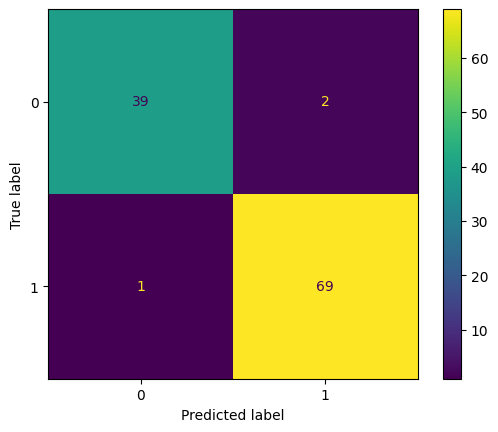

In [42]:
# Evaluate the model's performance on the test dataset, focusing on metrics such as accuracy, F1 score, ROC AUC, and the confusion matrix.

# Reporting computational time for model training and grid search
print(f'Total Time: \t{total_time} seconds')

# Displaying the average accuracy obtained from cross-validation
print(f"Avg acc (CV):\t{gscv_only_k.best_score_:.4f}")

# Fitting the best model found via grid search to the training data
best_estimator = gscv_only_k.best_estimator_
best_estimator.fit(Xtrain, ytrain['target'])

# Predicting class labels for the test set
ypred = best_estimator.predict(Xtest)

# Obtaining probability estimates for the test set (used for ROC AUC calculation)
yprob = best_estimator.predict_proba(Xtest)[:, 1]  # Extracting probabilities for the positive class

# Computing and displaying accuracy and F1 score for the test set
print(f'Acc (Test): \t{accuracy_score(ytest["target"], ypred):.4f}')
print(f'F1 (Test): \t{f1_score(ytest["target"], ypred):.4f}')

# Calculating and printing the ROC AUC score
roc_auc = roc_auc_score(ytest["target"], yprob)
print(f'AUC: \t\t{roc_auc:.4f}')

# Generating and displaying the confusion matrix
cm = confusion_matrix(ytest["target"], ypred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [43]:
# Tunning the model in all parameters

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_with_weights = GridSearchCV(
    estimator,
    param_grid,
    scoring="accuracy",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

start_time = datetime.now()
gscv_with_weights.fit(Xtrain,ytrain["target"])
total_time = datetime.now() - start_time

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [44]:
gscv_with_weights.best_params_

{'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}

Total Time: 	0:00:02.230090 seconds
Avg acc (CV):	0.9707
Acc (Test): 	0.9730
F1 (Test): 	0.9787
AUC: 		0.9944


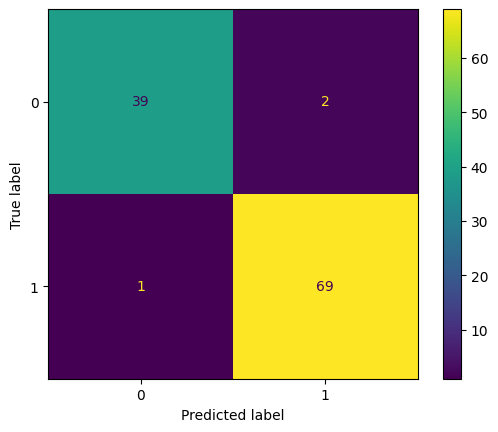

In [45]:
# Evaluate the model's performance on the test dataset, focusing on metrics such as accuracy, F1 score, ROC AUC, and the confusion matrix.

# Reporting computational time for model training and grid search
print(f'Total Time: \t{total_time} seconds')

# Displaying the average accuracy obtained from cross-validation
print(f"Avg acc (CV):\t{gscv_with_weights.best_score_:.4f}")

# Fitting the best model found via grid search to the training data
best_estimator = gscv_with_weights.best_estimator_
best_estimator.fit(Xtrain, ytrain['target'])

# Predicting class labels for the test set
ypred = best_estimator.predict(Xtest)

# Obtaining probability estimates for the test set (used for ROC AUC calculation)
yprob = best_estimator.predict_proba(Xtest)[:, 1]  # Extracting probabilities for the positive class

# Computing and displaying accuracy and F1 score for the test set
print(f'Acc (Test): \t{accuracy_score(ytest["target"], ypred):.4f}')
print(f'F1 (Test): \t{f1_score(ytest["target"], ypred):.4f}')

# Calculating and printing the ROC AUC score
roc_auc = roc_auc_score(ytest["target"], yprob)
print(f'AUC: \t\t{roc_auc:.4f}')

# Generating and displaying the confusion matrix
cm = confusion_matrix(ytest["target"], ypred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

Index([496, 38, 414], dtype='int64')


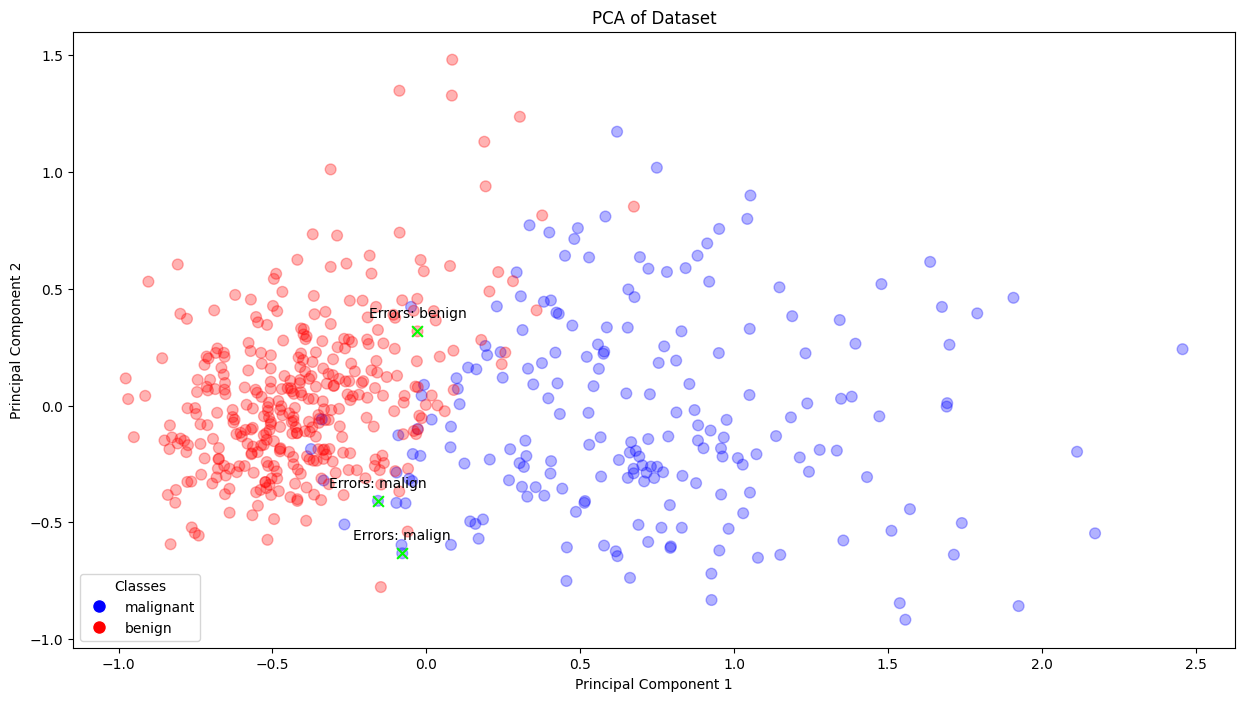

In [46]:
# Let's check graphcally which examples couldn't correctly classified by our model
errors = ytest["target"][ytest["target"] != ypred].index
print_pca(X_cleaned,y_cleaned,list(errors),text='Errors: ')

#### Answer 6:
##### **Computational Time:** Introducing the "weights" parameter into the hyper-parameter tuning process increased the total computational time from 0.549469 seconds (only tuning n_neighbors) to 2.230090 seconds. This increase is expected as the addition of another parameter to tune expands the search space, requiring more computational resources and time to evaluate the combinations.
##### **Performance metrics:** All performance metrics remained the same with respect of tunning weights or not in the cross validation process.
##### **Note:** All erros (False Positive and False Negative) remain the same from the previous model.
# ------------------------------------------------------------------------------------------

#### 7) Following the same approach as in the last section, enter the type of distance metric (“metric” parameter) within the cross-validation process. Evaluates the results and gains / losses of generalizability of the model.

In [47]:
param_grid = {'KNN__weights':['uniform','distance'],
               'KNN__metric':['cityblock','minkowski','cosine'],
               'KNN__p':[2,3,4,5,6,7],
               'KNN__n_neighbors':[3,5,7,9,11,13,15]}

In [48]:
# Tunning the model in all parameters

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_complete = GridSearchCV(
    estimator,
    param_grid,
    scoring="accuracy",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

start_time = datetime.now()
gscv_complete.fit(Xtrain,ytrain['target'])
total_time = datetime.now() - start_time

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


In [49]:
gscv_complete.best_params_

{'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 5,
 'KNN__p': 3,
 'KNN__weights': 'uniform'}

Total Time: 	0:00:07.838689 seconds
Avg acc (CV):	0.9729
Acc (Test): 	0.9820
F1 (Test): 	0.9859
AUC: 		0.9854


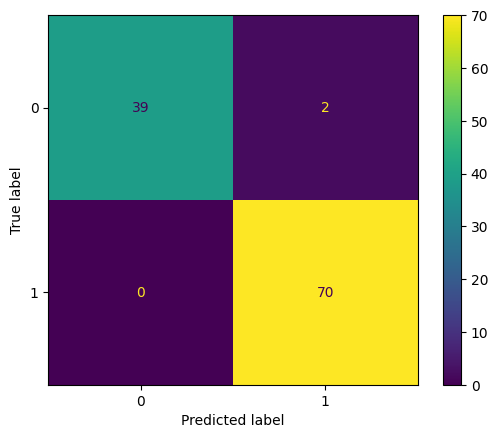

In [50]:
# Evaluate the model's performance on the test dataset, focusing on metrics such as accuracy, F1 score, ROC AUC, and the confusion matrix.

# Reporting computational time for model training and grid search
print(f'Total Time: \t{total_time} seconds')

# Displaying the average accuracy obtained from cross-validation
print(f"Avg acc (CV):\t{gscv_complete.best_score_:.4f}")

# Fitting the best model found via grid search to the training data
best_estimator = gscv_complete.best_estimator_
best_estimator.fit(Xtrain, ytrain['target'])

# Predicting class labels for the test set
ypred = best_estimator.predict(Xtest)

# Obtaining probability estimates for the test set (used for ROC AUC calculation)
yprob = best_estimator.predict_proba(Xtest)[:, 1]  # Extracting probabilities for the positive class

# Computing and displaying accuracy and F1 score for the test set
print(f'Acc (Test): \t{accuracy_score(ytest["target"], ypred):.4f}')
print(f'F1 (Test): \t{f1_score(ytest["target"], ypred):.4f}')

# Calculating and printing the ROC AUC score
roc_auc = roc_auc_score(ytest["target"], yprob)
print(f'AUC: \t\t{roc_auc:.4f}')

# Generating and displaying the confusion matrix
cm = confusion_matrix(ytest["target"], ypred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

Index([514, 414], dtype='int64')


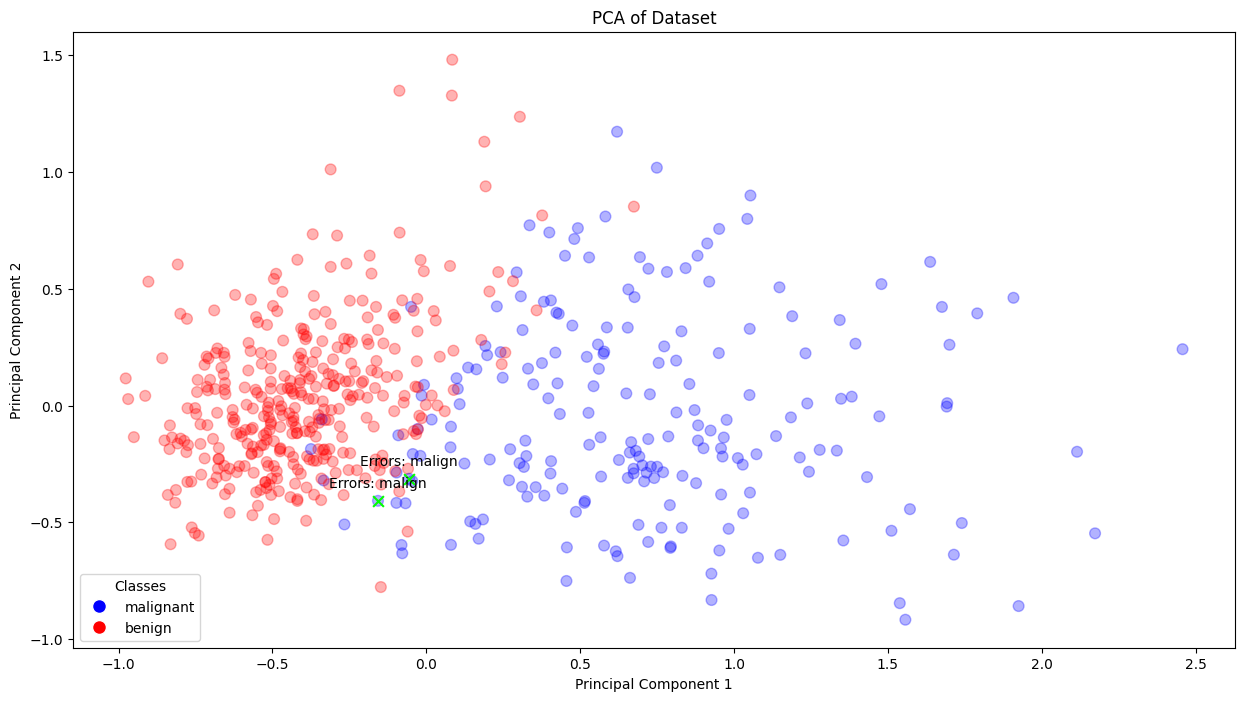

In [51]:
# Let's check graphcally which examples couldn't correctly classified by our model
errors = ytest["target"][ytest["target"] != ypred].index
print_pca(X_cleaned,y_cleaned,list(errors),text='Errors: ')

#### Answer 7:
##### **Computational Time:** The total computational time increased to 7.838689 seconds, which is expected due to the expanded parameter grid that includes multiple types of distance metrics, weights, powers for the Minkowski metric, and numbers of neighbors. This expansion of the hyper-parameter space naturally demands more computational resources to evaluate all possible combinations.
##### **Average Accuracy (Cross-Validation):** The average accuracy in cross-validation improved to 0.9729, indicating that the inclusion of different distance metrics and their combinations with weights and numbers of neighbors enhances the model's ability to generalize from the training data to unseen validation data. 
##### **Accuracy (Test):** There was a notable increase in test accuracy to 0.9820. This enhancement in accuracy on the test set demonstrates that the model's generalization to unseen data has improved as a result of the more extensive hyper-parameter tuning process. It indicates that the best combination of distance metric, weight, and number of neighbors found through cross-validation leads to a model that is better aligned with the underlying patterns in the data.
##### **F1 Score (Test):** The F1 score increased to 0.9859, reflecting a significant improvement in the model's precision and recall balance. This increase is particularly important in contexts where it's crucial to maintain a balance between reducing false positives and false negatives, suggesting that the model's predictive performance is not only accurate but also precise and reliable.
##### **AUC (Area Under the Curve):** The AUC score remained at 0.9854, indicating that the model's ability to distinguish between classes is maintained at a high level. While the AUC did not improve, maintaining a high AUC score while increasing accuracy and F1 scores is indicative of a model that is both robust and discriminative.
##### **Note:** 1 of the False Positive errors is the same we found accross all models we've built until now, what can suggest it's a very difficult point to predict and maybe the KNN model isn't able to correctly evaluate it. In order to have better results we should try other ML model families.
# ------------------------------------------------------------------------------------------

#### Now let's print Train dataset and add the prediction errors on the plot to analyse if the train dataset has some different pattern that is causing this errors in test

In [ ]:
# Let's print only test dataset with correspond errors
errors = ytest["target"][ytest["target"] != ypred].index
errors_points = Xtest.loc[errors]
print_pca(Xtrain,ytrain,highlight_points=errors_points)

#### Now let's check another dimension reducer to see if we have different conclusions

In [ ]:
# Let's see using StandardScaler()
print_pca(X_cleaned,y_cleaned,highlight_index=errors,scaler=StandardScaler())

In [ ]:
from sklearn.manifold import TSNE
# Now let's check with TSNE transformer
print_pca(X_cleaned,y_cleaned,highlight_index=errors,dim_reducer=TSNE(n_components=2))

In [ ]:
# Now let's see with StandardScaler and TSNE
print_pca(X_cleaned,y_cleaned,highlight_index=errors,dim_reducer=TSNE(n_components=2),scaler=StandardScaler())

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

print_pca(X_cleaned,y_cleaned,highlight_index=errors,dim_reducer=TSNE(n_components=2),scaler=MaxAbsScaler())